## Q2

### a

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-1, 1, 10000)
y_true = np.exp(x)

In [2]:
def cheby_model(x, y, ord):
    len_x = len(x)
    mat=np.zeros([len_x,ord+1])
    mat[:,0]=1.0
    if ord>0:
        mat[:,1]=x
    if ord>1:
        for i in range(1,ord):
            mat[:,i+1]=2*x*mat[:,i]-mat[:,i-1]
    coeff = np.polynomial.chebyshev.chebfit(x, y, ord)
    pred = np.dot(mat, coeff)
    error = np.abs(y-pred)
    return pred, error

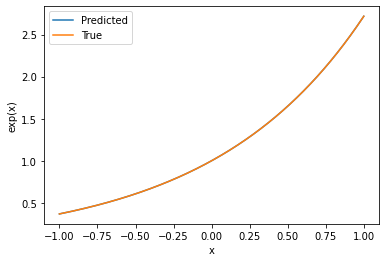

In [3]:
pred, error = cheby_model(x, y_true, 6)
plt.plot(x, pred, label="Predicted")
plt.plot(x, y_true, label="True")
plt.xlabel("x")
plt.ylabel("exp(x)")
plt.legend()

In [4]:
order = []
max_error = []
for ord in np.arange(6, 70):
    pred, error = cheby_model(x, y_true, ord)
    max_error.append(np.max(error))
    order.append(ord)

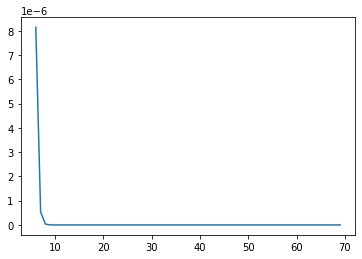

In [5]:
plt.plot(order, max_error)

### b

In [6]:
#Fitting with 6th order
pred, error = cheby_model(x, y_true, 6)
max_error = np.max(error)
rms_error = np.sqrt(np.mean((error**2)))
print("Max error is {} and rms error is {}".format(max_error, rms_error))

Max error is 8.14089489953318e-06 and rms error is 1.972849256645527e-06


In [7]:
#Fitting with much higher order and truncating at 6 order
ord = 50
len_x = len(x)
mat=np.zeros([len_x,ord+1])
mat[:,0]=1.0
mat[:,1]=x
for i in range(1,ord):
    mat[:,i+1]=2*x*mat[:,i]-mat[:,i-1]
coeff = np.polynomial.chebyshev.chebfit(x, y_true, ord)
pred = np.dot(mat, coeff)
max_error = np.max(np.abs(pred - y_true))
rms_error = np.sqrt(np.mean(((pred - y_true)**2)))
print("Max error is {} and rms error is {} for 50 order fit".format(max_error, rms_error))
mat_new = mat[:, 0:7:1]
coeff_new = coeff[0:7:1]
pred_new = np.dot(mat_new, coeff_new)
max_error_new = np.max(np.abs(pred_new - y_true))
rms_error_new = np.sqrt(np.mean(((pred_new - y_true)**2)))
print("Max error is {} and rms error is {} for truncated fit".format(max_error_new, rms_error_new))

Max error is 2.6645352591003757e-14 and rms error is 2.494268913634607e-15 for 50 order fit
Max error is 3.409262370634991e-06 and rms error is 2.2576919589183386e-06 for truncated fit


In [71]:
max_error_pred = 0
for i in range(7, 50):
    max_error_pred += np.abs(coeff[i])
print("Max error predicted based on the terms I ignored = {}".format(max_error_pred))

Max error predicted based on the terms I ignored = 3.409262375245167e-06


As can be seen, the calculated max error agrees with the max error predicted based on the terms I ignored. Also, the max error when using the trucated fit is more than a factor of 2 less than when fitting with 6th order polynomial directly, however, the rms error is higher

# Q4

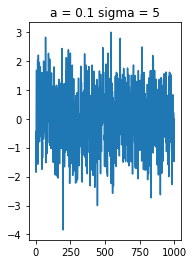

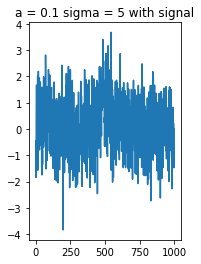

For a = 0.1 and sigma = 5, error = 0.15576335487646098


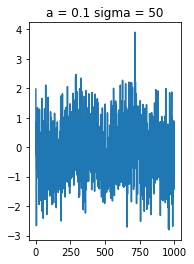

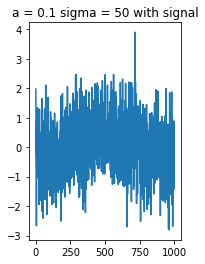

For a = 0.1 and sigma = 50, error = 0.33774489562315885


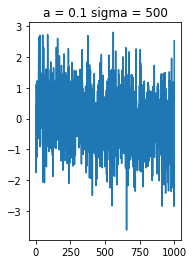

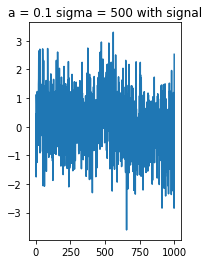

For a = 0.1 and sigma = 500, error = 0.1275749999311398


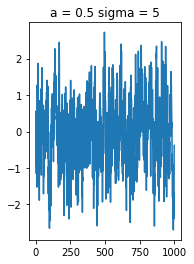

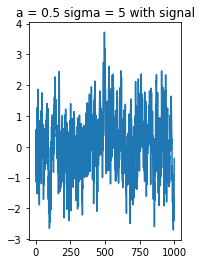

For a = 0.5 and sigma = 5, error = 0.2759993508033393


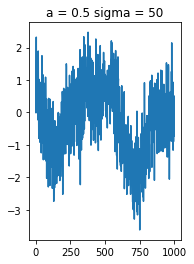

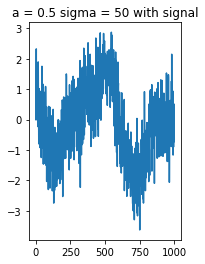

For a = 0.5 and sigma = 50, error = 0.7140544770562203


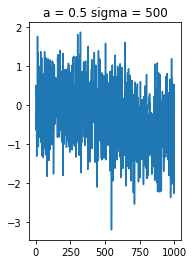

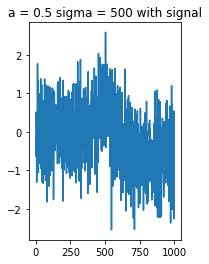

For a = 0.5 and sigma = 500, error = 0.10066386685510012


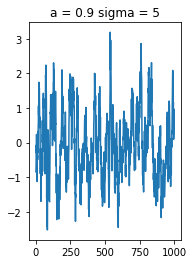

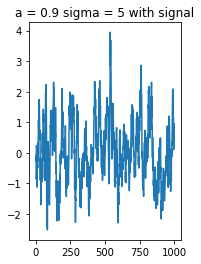

For a = 0.9 and sigma = 5, error = 0.3578952599636376


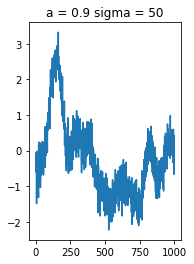

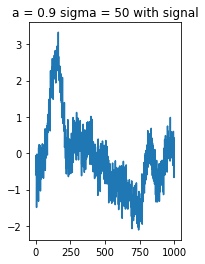

For a = 0.9 and sigma = 50, error = 0.9499319468584101


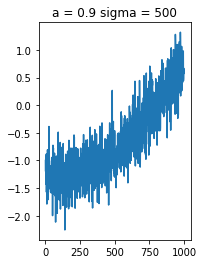

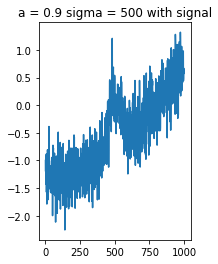

For a = 0.9 and sigma = 500, error = 0.04892550964025485


In [110]:
size = 1000
x = np.linspace(0, 999, size)
signal = np.exp(-(x-499.5)**2/(2*50**2))
A = np.zeros([1000])
for i in range(1000):
    A[i] = np.exp(-(x[i]-499.5)**2/(2*50**2))
a = [0.1,0.5,0.9]
sigma = [5,50,500]
N = np.zeros([1000,1000])
count=1
for i in a:
    for j in sigma:
        for row in range(1000):
            for col in range(1000):
                N[row][col] = i*np.exp(-(row-col)**2/(2*j**2))
                if row == col:
                    N[row][col] = N[row][col] + 1 - i
        #Getting noise realisation for the matrix
        w,v = np.linalg.eigh(N)
        n=np.sqrt(w)*np.random.randn(size)
        N_realisation = v@n
        plt.figure()
        plt.subplot(1, 2, 1)
        #Plotting the noise realisation without and with the signal
        plt.plot(N_realisation)
        plt.title("a = "+str(i)+" sigma = "+str(j))
        plt.show()
        count+=1
        plt.subplot(1, 2, 2)
        plt.plot(N_realisation+A)
        plt.title("a = "+str(i)+" sigma = "+str(j)+" with signal")
        plt.show()
        count+=1
        #Getting the error
        N_inv = np.linalg.inv(N)
        error_amp = np.sqrt(1/(A.T@N_inv@A))
        print("For a = {} and sigma = {}, error = {}".format(i, j, error_amp))

As can be seen, the error for a=0.5 and sigma=5 matched Jon's value

For each value of a, the errors are the highest when sigma = 50, which is the sigma of the signal. This makes
sense as if the noise and data have the same sigma, it would be harder to differentiate them. a=0.9 and sigma=50 
has the most error as a=0.9 makes the noise highly correlated over sigma=50 which is also the sigma of the data. 
a=0.9 and sigma=500 has the least error, as now the noise is correlated over longer lengths, so the signal is 
clearly visible. We should be careful about the noise which has the same sigma as the signal.

# Q3

In [98]:
N=np.eye(10)+1
size = 100000
eig_val, eig_vec = np.linalg.eigh(N)
corr_data = np.zeros([10, 100000])
corr_data_final = np.zeros([10, 100000])

In [99]:
for i in range(size):
    corr_data[:,i] = np.sqrt(eig_val)*np.random.randn(corr_data.shape[0])

In [100]:
corr_data_final = eig_vec@corr_data

In [102]:
N_estimate = np.zeros([10, 10])
for i in range(size):
    x = corr_data_final[:,i:i+1].copy()
    N_estimate[:] = N_estimate + x@x.T
N_estimate[:] = N_estimate/size
N_estimate

array([[1.99921202, 0.99770798, 0.99907127, 0.99023327, 0.99922722,
        1.00098466, 1.0022756 , 0.99762203, 0.99677891, 0.99981201],
       [0.99770798, 2.00619263, 1.00212524, 0.99696597, 0.99769594,
        0.99940808, 1.00679031, 1.00585406, 1.00560023, 1.00416753],
       [0.99907127, 1.00212524, 2.00251688, 0.99885919, 1.00437888,
        0.99991941, 1.00245813, 1.00055945, 0.99857298, 1.0036263 ],
       [0.99023327, 0.99696597, 0.99885919, 1.99237143, 0.99471838,
        0.99396823, 1.00212904, 0.99764127, 0.99343266, 0.99957515],
       [0.99922722, 0.99769594, 1.00437888, 0.99471838, 2.00633055,
        1.00205307, 1.0074678 , 1.00414483, 1.00485786, 1.00098079],
       [1.00098466, 0.99940808, 0.99991941, 0.99396823, 1.00205307,
        1.99327383, 1.00799344, 0.99984401, 0.99532663, 0.99985063],
       [1.0022756 , 1.00679031, 1.00245813, 1.00212904, 1.0074678 ,
        1.00799344, 2.00849985, 1.00858779, 1.004374  , 1.01029876],
       [0.99762203, 1.00585406, 1.0005594

As can be seen, N_estimate is very close to the initial N I started with. The explaination of how I got this is in the report.

## Q1

Text(0, 0.5, 'Error')

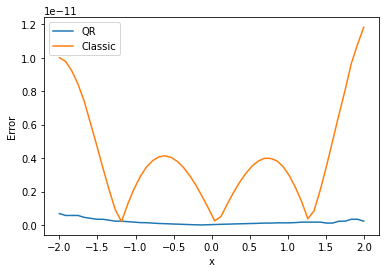

In [70]:
import numpy as np
x=np.linspace(-2,2)
y=-7*x + 5*x**2 + 113*x**3
ord=5
n=len(x)
mat=np.zeros([n,ord+1])
for i in range(ord+1):
    mat[:,i]=x**i
q,r = np.linalg.qr(mat)
fit_qr = np.linalg.inv(r)@q.T@y
pred_qr = mat@fit_qr

lhs = mat.T@mat
rhs = mat.T@y
fit_classic = np.linalg.inv(lhs)@rhs
pred_classic = mat@fit_classic

error_qr = np.abs(pred_qr-y)
error_classic = np.abs(pred_classic-y)
plt.plot(x, error_qr, label="QR")
plt.plot(x, error_classic, label="Classic")
plt.legend()
plt.xlabel("x")
plt.ylabel("Error")

As can be seen, QR decomposition is more accurate than the classical fit method! 

The explanation of this is in the report